# Интерполяция кривой

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.interpolate as interp

## Генерация точек

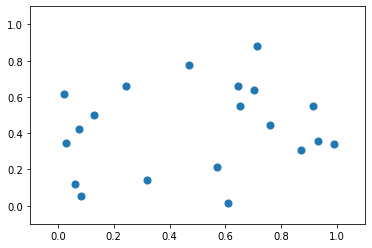

In [2]:
points = np.random.uniform(size=(2, 20))
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.scatter(points[0], points[1], s=50)
plt.show()

## Барицентрическая интерполяция при помощи scipy

Воспользуемся алгоритмом [Барицентрической интерполяции](https://github.com/scipy/scipy/blob/47bb6febaa10658c72962b9615d5d5aa2513fa3a/scipy/interpolate/polyint.py#L498) из библиотеки `scipy`.

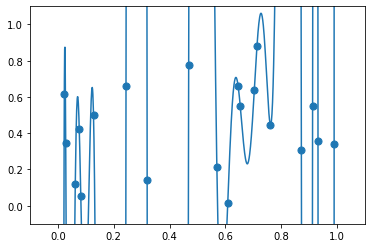

In [3]:
def interpolate(interpolator, interpolation_points, k):
    interpolation_function = interpolator(interpolation_points[0], interpolation_points[1])
    interpolated_x = np.arange(0, 1 + (1 / k), (1 / k))
    interpolated_y = np.array([interpolation_function(x) for x in interpolated_x])

    plt.scatter(interpolation_points[0], interpolation_points[1], s=50)
    plt.plot(interpolated_x, interpolated_y)
    plt.xlim(-0.1, 1.1)
    plt.ylim(-0.1, 1.1)
    plt.show()


interpolate(interp.BarycentricInterpolator, points, 1000)

## Интерполяция через формулу Ньютона

Реализую интерполяцию через [интерполяционную формулу Ньютона](https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D1%82%D0%B5%D1%80%D0%BF%D0%BE%D0%BB%D1%8F%D1%86%D0%B8%D0%BE%D0%BD%D0%BD%D1%8B%D0%B5_%D1%84%D0%BE%D1%80%D0%BC%D1%83%D0%BB%D1%8B_%D0%9D%D1%8C%D1%8E%D1%82%D0%BE%D0%BD%D0%B0). Так же воспользуемся функцией из прошлого пункта для визуализации.

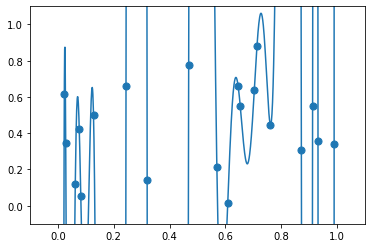

In [4]:
def my_interpolator(x, y):
    n = len(x)
    c = np.zeros([n, n])
    c[:, 0] = y
    for j in range(1, n):
        for i in range(n - j):
            c[i][j] = (c[i + 1][j - 1] - c[i][j - 1]) / (x[i + j] - x[i])

    def my_interpolation_function(t):
        nn = len(x)
        cc = c[0, :]
        result = cc[nn - 1]
        for l in range(1, nn):
            result = result * (t - x[nn - l - 1]) + cc[nn - l - 1]
        return result

    return my_interpolation_function


interpolate(my_interpolator, points, 1000)